1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# 데이터 확인
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)
data



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Check NaN

In [4]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Count label (graph)

Text(0.5, 1.0, 'class')

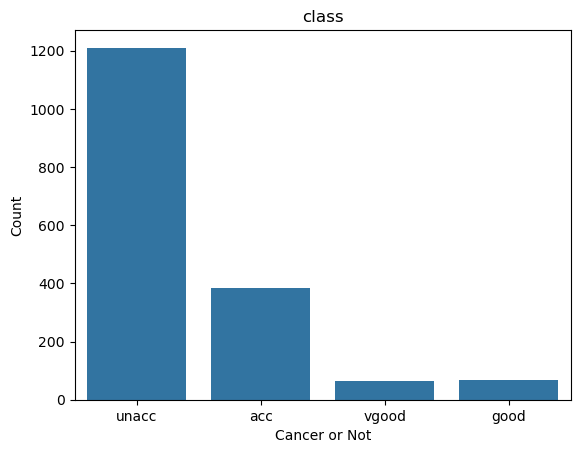

In [5]:
sns.countplot(data = data, x="class")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("class")

### Count label (number)

In [34]:
data['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [66]:
X = data.drop('class', axis=1)

X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [67]:
y = data['class']
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [92]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [93]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [94]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1382, 6), (1382,), (346, 6), (346,))

### LR

In [98]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

ValueError: could not convert string to float: 'low'

### RF

In [38]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24401913875598086
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 13 14  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 10 19 24  4  4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 25 34 33 13  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  5 21 54 34 18  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 39 49 39 15  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 15 37 34 32  5  5  1  2  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  6  8 28 35 31  4  5  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 18 27 26  3  5  2  1  2  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5  9 15  8  5  1  1  2  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  8  9  0  4  3  0  2  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  3  7  4  2  1  3  0  1  0  0  0  0

### DT

In [39]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.19808612440191387
[[ 1  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 11 16  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 18 17  9  4  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 25 27 31 12  6  3  2  0  1  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12 26 42 29 11  9  4  3  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 33 39 21 21 14  4  4  2  0  1  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  2 18 35 31 21 15  3  3  3  3  2  1  0  0  1  0  0  0  0]
 [ 0  0  0  1  5  8 30 24 14 14 13  5  4  1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  4  8 18 25  9  7  7  5  3  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  4  2  3 10  7  7  6  4  1  2  1  2  0  1  0  1  0  0]
 [ 0  0  0  0  2  1  5  0  2  3  3  3  3  0  3  2  0  3  1  1  0  0  0]
 [ 0  0  0  0  0  2  1  2  4  4  3  3  0  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0

In [ ]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

# true_class에 대한 통계와 reconstruction_error에 대한 통계 출력
error_summary = error_df.groupby('true_class').agg(['mean', 'std', 'min', 'max', 'count'])
print(error_summary)


In [ ]:
error_df.head()

In [ ]:
threshold = 10

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Abnormal" if name == "jumping" else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# threshold에 따라 y_pred 생성
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

# true_class가 문자열로 되어 있을 경우 정수형으로 변환
true_class_labels = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood':3},  # 레이블을 정수형으로 매핑
error_df['true_class'] = error_df['true_class'].map(true_class_labels)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
             xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# 분류 리포트 출력
print(classification_report(error_df.true_class, y_pred))